<script type="text/x-mathjax-config">
MathJax.Hub.Config({
  TeX: { equationNumbers: { autoNumber: "all" } }
});
</script>

<h1 align=center> Hands on Session 1: Artificial Neural Networks</h1>
<br><br>
<center><h4>PhD. Eduardo Ulises Moya\* </h4></center>
<center><h4>Abraham Sánchez\* </h4></center>
<center><h4>PhD. Ulises Cortés**</h4></center>

<center><h4>*BSC</h4></center>
<center><h4>*UAG</h4></center>
<center><h4>**UPC/BSC</h4></center>
<br><br>

---
<div class="alert alert-block alert-info" style="margin-top: 20px">
### Table of Contents:
<ul>
    <li><p><a href="#ref1">**1. Biological Neuron**</a></p></li>
    <ul>
        <li><p><a href="#ref1_1">1.1. Elements of a biological neuron</a></p></li>
    </ul>
    <li><p><a href="#ref2">**2. Artificial Neuron**</a></p></li>
    <ul>
        <li><p><a href="#ref2_1">2.1. Elements of an artificial neuron</a></p></li>
    </ul>
    <li><p><a href="#ref3">**3. Model**</a></p></li>
    <ul>
        <li><p><a href="#ref3_1">3.1. Mathematical model</a></p></li>
        <li><p><a href="#ref3_2">3.2. Activation Function</a></p></li>
        <li><p><a href="#ref3_3">3.3. Learning stage</a></p></li>
    </ul>
    <li><p><a href="#ref4">**4. Perceptron**</a></p></li>
    <ul>
        <li><p><a href="#ref4_1">Implementation</a></p></li>
    </ul>
    <li><p><a href="#ref5">**5. Backpropagation algorithm**</a></p></li>
    <ul>
        <li><p><a href="#ref5_1">5.1 Feedforward step</a></p></li>
        <li><p><a href="#ref5_2">5.2 Backpropagation step</a></p></li>
        <li><p><a href="#ref5_3">5.3 Weights update</a></p></li>
        <li><p><a href="#ref5_3">Implementation</a></p></li>
    </ul>
</ul>
<div>

<div class="alert alert-block alert-info" style="margin-top: 20px">
<a id="ref1"></a>
<h2>**1. Biological Neuron**</h2>
<div>

A neural network is defined as a population of physically interconnected neurons or a group of isolated neurons that receive signals that process in the manner of a recognizable circuit.

The communication between neurons, which implies an electrochemical process, implies that, once a neuron is excited from a certain threshold, it is depolarized by transmitting through its axon a signal that excites nearby neurons, and so on.

Neurons have three main components: the dendrites, the body of the cell or soma and the axon.

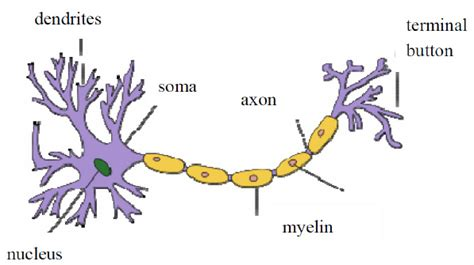

<a id="ref1_1"></a>
<h3>**1.1. Elements of a biological neuron**</h3>

- **Dendrites.** Receiving element; dentrites are like nerve fibers that carry electrical signals to the body of the cell; during growth the number of dendrites increases, but then the specialization predominates.
- **Soma.** Sum of those signals. It includes the nucleus, it is where energy is mainly produced.
- **Axon.** It is a long fiber that carries the signal from the body of the cell to others. The point of contact between the axon of one cell and the dendrite of another is called the synapse.

<div class="alert alert-block alert-info" style="margin-top: 20px">
<a id="ref2"></a>
<h2>**2. Artificial Neuron**</h2>
</div>

The model of an artificial neuron is an imitation of the process of a biological neuron. An artificial neuron is the fundamental unit for the operation of an artificial neural network.

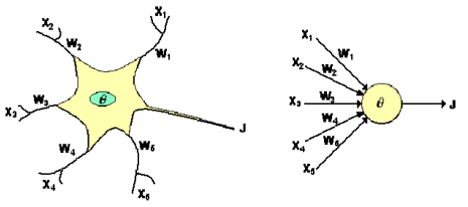

<a id="ref2_1"></a>
<h3>**2.1. Elements of an artificial neuron**</h3>

Based on the biological model, the following elements are found with the artificial system:

- **Input ($X$).** It represents the signals coming from other neurons, captured by the dendrites.
- **Weights ($W$).** It represents the intensity of the synapse that connects two neurons. 
- **Activation Function (Threshold $\theta$)**. Threshold that the signal of the neuron must surpass to activate (it happens biologically in the body of the cell).
- **Outut ($y$).** Output value of the neuron.

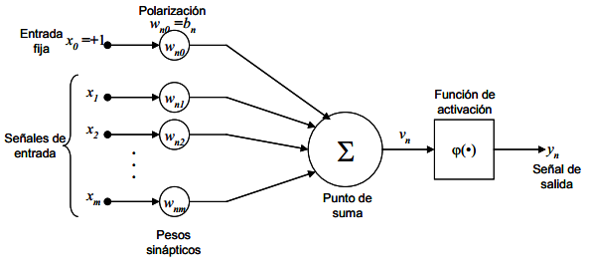

<div class="alert alert-block alert-info" style="margin-top: 20px">
<a id="ref3"></a>
<h2>**3. Model**</h2>
</div>

The neuron is the fundamental information processing unit in a neural network and its basic model is composed of the following:

- **Connection links.** Parameterized by the synaptic weights $W_i$. If $W_i> 0$ then the connection is also exciting if $W_i < 0$ the connection is inhibiting.
- **Sum.** Sum of input signals multiplied by $𝑊_𝑖$.
- **Activation function (Threshold).** Non-linear transformation.


<a id="ref3_1"></a>
<h3>**3.1. Mathematical model**</h3>

In mathematical terms, it is possible to describe the neuron by the following equations.

\begin{equation}
v(k)=\displaystyle\sum_{i=1}^{p} x_i(k)w_{i}(k) \quad o \quad v(k)=x(k)w^T(k)+b(k)
\end{equation}

\begin{equation}
y(k)=\varphi(v(k))
\end{equation}

where $𝑥_1, 𝑥_2, ..., 𝑥_𝑚$ are the input signals; $𝑤_1, 𝑤_2, ..., 𝑤_𝑚$ are the synaptic weights; $u$ is the linear combination of the weighted entries; $b$ is the polarization; $\varphi(.)$ is the activation function; $y$ is the output signal of the neuron; $p$ is the dimension of vector $x$; sub-index $k$ is the iteration for each pattern of the input data.

<a id="ref3_2"></a>
<h3>**3.2. Activation Function**</h3>

The activation functions, denoted by $\varphi(.)$ defines the output of the neuron. Here are some of them:

<h4>Step function</h4>
\begin{equation}
\varphi(v) =
  \begin{cases}
    1       & \quad \text{if } v >= 0\\
    0       & \quad \text{if } v < 0
  \end{cases}
\end{equation}

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Step function
def step(v):
    v = v >= 0
    return v*1

l = np.array(np.arange(-10, 10, 0.1))
f = step(l)

plt.plot(l, f)
plt.show()

<h4>Sigmoid function</h4>
\begin{equation}
\varphi(v) = \frac{1}{1+e^-v}
\end{equation}

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Sigmoid function
def sigmoid(z):
    return 1/(1 + np.exp(-z))

l = np.array(np.arange(-10, 10, 0.1))
f = sigmoid(l)

plt.plot(l, f)
plt.show()

<h4>ReLU function</h4>
\begin{equation}
\varphi(v) = max(0,v)
\end{equation}

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import math

def relu(v):
    return v*(v>0)

l = np.array(np.arange(-10, 10, 0.1))
f = relu(l)

plt.plot(l, f)
plt.show()

<a id="ref3_3"></a>
<h3>**3.3. Learning stage**</h3>

Learning is a process by which the parameters are adapted, by the continuous interaction with the environment. The type of learning is determined by the way in which this adaptation is made.

This process involves the following sequence of events:
<ul>
    <li>The neural network is stimulated by the environment (input data).</li>
    <li>The neural network adjusts its parameters (weights).</li>
    <li>The neural network generates a response (activation function).</li>
    <li>Stop until the error is the minimum acceptable (i.e. 0.01) or in the case of the perceptron, all its outputs are equal to the target.</li>
</ul>
The weights of the neural network are adjusted as follows:

\begin{equation}
w(k+1) = w(k) + \Delta w
\end{equation}

\begin{equation}
w(k+1) = w(k) + e(k)x(k)\eta
\end{equation}

Where $w$ is the weight matrix; $e$ is the error; $x$ is the input vector; $\eta$ is the learning rate.

For the bias:

\begin{equation}
b(k+1) = b(k) + \Delta b
\end{equation}

\begin{equation}
b(k+1) = b(k) + e(k)\eta
\end{equation}

This mechanism is also known as <b>adaptive filter</b>.

<div class="alert alert-block alert-info" style="margin-top: 20px">
<a id="ref4"></a>
<h2>**4. Perceptron**</h2>
</div>

The perceptron is the simplest form of a neural network used for the classification of <b>linearly separable patterns</b> (patterns that are located on opposite sides of a hyperplane).

It basically consists of a single neuron with adjustable weights and a bias.

<a id="ref4_1"></a>
<h2>**Implementation**</h2>

In [ ]:
# Import 
import numpy as np # Numeric library python
import matplotlib.pyplot as plt # Plot

# Perceptron class
class SinglePerceptron:

  # Constructor
  def __init__(self, x=np.array([]), t=np.array([])):
    self.x = x
    self.t = t
    # Init Random weights
    self.w = np.random.rand(len(t[1,:]), len(x[1,:]))
    self.b = np.random.rand(1, np.size(t[1,:])) # bias

  # Activation function (step)
  def step(self, v):
    v = v >= 0
    return v*1

  # Get weights
  def weight(self):
    return self.w

  # Get bias
  def bias(self):
    return self.b

  # Training
  def train(self, eta=0.03, max_epoch=100000):  #  <-----------Change the learning rate (eta) and the max of epochs 
    flag = False
    epoch = 0
    while not flag and epoch < max_epoch:
      flag = True
      for k in range(0, len(self.x[:,1])):
        v = np.dot(self.x[k,:], self.w.T) + self.b
        y = self.step(v)
        e = self.t[k] - y
        if y != self.t[k]:
          self.w = self.w + (e * self.x[k,:] * eta)
          self.b = self.b + (e * eta)
          flag = False
      epoch += 1

    
  # Plot results
  def plot(self):
    if len(self.x[1,:]) > 2 and len(self.t[1,:]) > 2: return
    clas = set(self.t.flatten())
    colors = ['ro', 'bo', 'yo','go']
    rel = dict(zip(clas, colors))
    
    plt.subplot(121)
    plt.title('Orignal representation')
    plt.ylabel('Feature 2')
    plt.xlabel('Feature 1')
    for n in range(0, len(x[:,1])):
      plt.plot(self.x[n,0], self.x[n,1], rel.get(self.t[n][0]))
    
    # Get two point (P1(x1,y1), P2(x2,y2)) and plot line in the hyperplane
    # Ax + By + C = 0
    A = self.w[0,0]
    B = self.w[0,1]
    C = self.b[0,0]
    x1 = np.max(self.x)
    x2 = np.min(self.x)
    # Finding final points of straight line:
    y1 = (-C-A*x1)/B
    y2 = (-C-A*x2)/B

    # Display straight line
    plt.subplot(122)
    plt.title('Linear separation')
    plt.ylabel('Feature 2')
    plt.xlabel('Feature 1')
    plt.plot([x1, x2],[y1, y2], '--')
    for n in range(0, len(x[:,1])):
      plt.plot(self.x[n,0], self.x[n,1], rel.get(self.t[n][0]))
    plt.show()

  # Simulation
  def sim(self, z, noise=0):
    v = np.dot(z+noise, self.w.T) + self.b
    y = self.step(v)
    return y

### AND Gate  Representation

Below is an example of a perceptron that seeks to find a solution for a logical AND gate, that is, weights must be found that can classify the points of this logic gate.

Input data:

\begin{equation}
X = 
 \begin{pmatrix}
  0 & 0\\
  0 & 1\\
  1 & 0\\
  1 & 1
 \end{pmatrix}
\end{equation}

Target:

\begin{equation}
t = 
 \begin{pmatrix}
  0\\
  0\\
  0\\
  1
 \end{pmatrix}
\end{equation}


In [ ]:
# AND gate representation using perceptron
# Input data
x = np.array([[0,0],
              [0,1],
              [1,0],
              [1,1]])

# target  data 
t = np.array([[0],
              [0],
              [0],
              [1]])

# Try  XOR gate after AND gate

#t = np.array([[0],
#              [1],
#              [1],
#              [0]])

In [ ]:
# Inizialization
# Constructor
#  def __init__(self, x=np.array([]), t=np.array([])):
#    self.x = x
#    self.t = t
    # Init Random weights
#    self.w = np.random.rand(len(t[1,:]), len(x[1,:]))
#    self.b = np.random.rand(1, np.size(t[1,:])) # bias

net=SinglePerceptron(x,t)

In [ ]:
# Show the target and the line before training
# t = np.array([[0],red
#              [0], red
#              [0], red
#              [1]] blue) 
net.plot()

In [ ]:
# Training step or learning rate
# We can set learning rate and
# the max number of iteration (just in case!!)
#---------------------------------------------
#while not flag and epoch < max_epoch:
#      flag = True
#      for k in range(0, len(self.x[:,1])):
#        v = np.dot(self.x[k,:], self.w.T) + self.b  <----- F_______________
#        y = self.step(v)      <--------------------- 
#        e = self.t[k] - y     <---------------------- E____
#        if y != self.t[k]:    <--------------If out is not the target....then
#          self.w = self.w + (e * self.x[k,:] * eta)   <------ Weigth update 
#          self.b = self.b + (e * eta)                 <-------________ update         
#          flag = False
#      epoch += 1
#------------------------------------------------


net.train(eta=0.05) # default eta value as 0.03

# Show training data
print ("\"Statistics\"")
print ("Weights after training..\n")
print ("W:\n", net.weight())
print ("b:\n", net.bias())

In [ ]:
# Simulation
# We are going to try with the same target data so...

res = net.sim(x)

print ("\n\"Simulation\"")
print ("Target:\n", t)
print ("\nResult:\n", res)

In [ ]:
# Display classification, after training
net.plot()

<div class="alert alert-success alertsuccess" style="margin-top: 20px">
**Remeber:** Try XOR gate.
</div>

---

## Many points classification 

Another classification example with more points

In [ ]:
# Input data
x = np.array([[0.5,0.5],
             [0.3,0.1],
             [0.1,-0.1],
             [-0.2,0.5],
             [0.4,-1.0],
             [-0.5,0.5],
             [0.5,-0.5],
             [0.0,-0.5],
             [0.5,0.0],
             [0.0,0.0],
             [0.25,-0.5],
             [0.25,0.5],
             [1.0,0.5],
             [1.5,-0.5],
             [1.25,-0.5],
             [1.0,-1.0],
             [2.0,0.0],
             [1.5,0.0]])
# Target data 
t = np.array([[0],
              [0],
              [0], 
              [0],
              [0],
              [0],
              [0],
              [0],
              [0],
              [0],
              [0],  # try to change [0] to [1]
              [0],
              [1],
              [1],
              [1],
              [1],
              [1],
              [1]])

In [ ]:
# Create the perceptron
net=SinglePerceptron(x,t)

In [ ]:
# Show line before training
net.plot()

In [ ]:
# Training step
# We can set learning rate and
# the max number of iteration (just in case)

net.train(eta=0.05) # default eta value as 0.03

# Show training data
print ("\"Statistics\"")
print ("Weights after training..\n")
print ("W:\n", net.weight())
print ("b:\n", net.bias())

In [ ]:
# Simulation
# We are going to try with the same target data so...

res = net.sim(x)

print ("\n\"Simulation\"")
print ("Target:\n", t)
print ("\nResult:\n", res)

In [ ]:
# Display classification, after training
net.plot()

---

<div class="alert alert-block alert-info" style="margin-top: 20px">
<a id="ref5"></a>
<h2>**5. MLP and Backpropagation**</h2>
</div>

In 1969 Minsky and Papert published their book Perceptrons: **"An Introduction to Computational Geometry"**, which signified a great stagnation in the theory of neural networks. A detailed analysis of the Perceptron was presented, in terms of its capabilities and limitations, especially in terms of the restrictions that exist for the problems that a Perceptron can solve. The biggest disadvantage of this type of network is its **inability to solve classification problems that are not linearly separable**.

The multilayer Perceptron, initially developed by **P. Werbos (1974)**, provides a solution to these problems. It has a structure with at least one hidden layer and its training algorithm is of the error correction type. Implement the gradient distributed in the different components of the network.


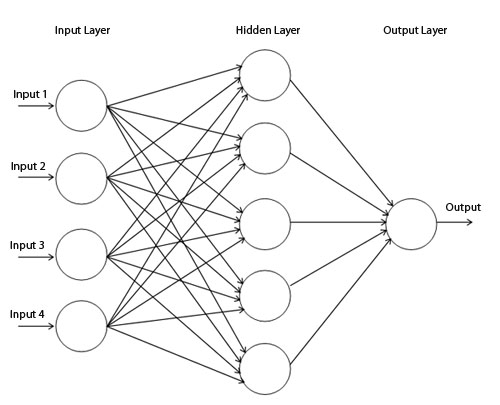

**M**ulti**L**ayer **P**erceptron (**MLP**), have been successfully applied to solve very diverse and difficult problems by means of the algorithm known as backpropagation.

The backpropagation algorithm consists of three stages:
1. **Feedforward**
The input signal to the network is presented, which propagates forward to produce the output.
2. **Backpropagation**
The error is calculated by obtaining the difference between the last layer of the network (output layer) and the desired value. Once the error is calculated, it is propagated to the previous layers (hidden layers) in order that they know the value of the error and can adapt their weights.
3. **Weights update**
Update weigths for the output and the hidden layers.

The MLP has three distinctive characteristics:
<ul>
<li> <i>The model of each neuron in the network includes a non-linear activation function </i>. The important thing here is that the non-linearity is smooth (differentiable at any point), the opposite of the sign function used in the Perceptron. One of the most used activation functions is the sigmoid function. </li>

<li><i>The network contains one or more hidden layers that are not part of the network's inputs or outputs </i>. These hidden neurons allow the network to learn complex tasks by the progressive extraction of the main characteristics of the input patterns.</li>

<li><i>The network presents high degrees of connectivity, determined by the synapses of the network </i>. The combination of these characteristics together with the ability to learn from experience through MLP training results in a
great computing potential. </li>
</ul>

<a id="ref5_1"></a>
<h3>**5.1 Feedforward**</h3>

The output of the hidden layer is calculated.

Hidden layer:

\begin{equation}
v_h(k)=\displaystyle\sum_{i=1}^{p} x_i(k)w_{h,i}(k) \quad o \quad v_h(k)=x(k)w_h^T(k)
\end{equation}
\begin{equation}
y_h(k)=\varphi(v_h(k))
\end{equation}

Output layer:

The same calculations are made to obtain the outputs of the output neurons.

\begin{equation}
v_o(k)=\displaystyle\sum_{j=1}^{q} y_{h,j}(k)w_{o,j}(k) \quad o \quad v_o(k)=y_h(k)w_o^T(k)
\end{equation}
\begin{equation}
y_o(k)=\varphi(v_o(k))
\end{equation}

The $h$ sub-index represents the hidden layer; sub-index $o$ is the output layer; $p$ is the dimension or size of vector $x$; $q$ is the number of neurons in the hidden layer; sub-index $k$ is the iteration for each pattern of the input data.

<a id="ref5_2"></a>
<h3>**5.2 Backpropagation**</h3>

We already know that to obtain the error a difference is made between the desired value $t(k)$ and the value obtained $y_o(k)$, the purpose of this step is to propagate this error towards each of the layers previous to reach the first layer, this because the intermediate layers (hidden layers) are unaware of the value of the error, this only knows the final layer since this is the one that compares its output against the desired value.

In this context, two different cases can be identified, depending on the location of the neuron:

**Case 1.** The neuron is an output node. Since the neuron is at the output then it is possible to determine the value of e(k) as and consequently the value of the local gradient is determined directly from the equation.

\begin{equation}
\delta_o(k) = (t(k)-y_o(k))\varphi'(v_o(k)) \quad\rightarrow\quad \delta_o(k) = (t(k)-y_o(k))y_o(k)(1-y_o(k))
\end{equation}

Where $\delta_o$ is the error of the output layer; $y_o$ is the output of the output layer; $\varphi'$ is the derivative of the activation function.


**Case 2.** The neuron is a hidden neuron. When the neuron is located in any of the hidden layers, the desired value for the output of said neuron is not available. Therefore, the error signal of said neuron must be determined recursively in terms of the error signal of the output neurons.

\begin{equation}
\delta_h(k)=x(k)\varphi'(y_h(k))\displaystyle\sum \delta_o(k) W_o(k)
\quad\rightarrow\quad
\delta_h(k)=x(k)y_h(k)(1-y_h(k))\displaystyle\sum \delta_o(k) W_o(k)
\end{equation}

Where $\delta_h$ is the error of hidden layer; $W_o$ are weights of output layer; $x$ is the input vector.

<a id="ref5_3"></a>
<h3>**5.3 Weights update**</h3>


Update weights for the output layer:

\begin{equation}
W_o(k+1)=W_o(k)+\Delta W_o(k)
\end{equation}
\begin{equation}
W_o(k+1)=W_o(k)+\eta \delta(k)y_h(k)
\end{equation}

Update weights for the hidden layer:

\begin{equation}
W_h(k+1)=W_h(k)+\Delta W_h(k)
\end{equation}
\begin{equation}
W_h(k+1)=W_h(k)+\eta x(k)\varphi '(y_h(k)) \displaystyle\sum \delta_o(k) W_o(k)
\end{equation}

These equations will allow updating the weights in relation to the error.

<a id="ref5_3"></a>
<h3>** MLP Implementation**</h3>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

class MultilayerPerceptron:

  # Constructor
  # x - Input matrix
  # t - Target matrix
  # neurons_hidden - Number of neurons in the hidden layer
  def __init__(self, x=np.array([]), t=np.array([]), neurons_hidden=2):
    self.x = x
    self.t = t
    # Init weights
    # Hidden layer weights
    self.wh = np.random.rand(neurons_hidden, np.size(self.x[1,:]))
    # Output layer weights
    self.wo = np.random.rand(1, neurons_hidden) # Using 1 hidden layer

  # Define activation function
  # Activation Function, SIGMOIDE
  def sigmoid(self, z):
    return 1/(1 + np.exp(-z))

  # Activation Function, DERIVATIVE SIGMOIDE
  def d_sigmoid(self, z):
    ds = z * (1 - z)
    return ds

  # Get weights
  def weight(self):
    return [self.wh, self.wo]

  # Training
  def train(self, eta=0.03, min_error=0.01,  max_epoch=75**3):
    av_e = 1
    loss = []
    epoch = 0
    print ("Training ... this may take a while, depends of the number of neurons established in the hidden layer,",
           "the learning rate and the error.\n")
    epoch = 0
    while av_e > min_error and epoch < max_epoch:
      E = np.zeros(np.shape(self.t))
      for k in range(0, len(self.x[:,1])):
        vh = np.dot(self.x[k,:], self.wh.T)
        yh = self.sigmoid(vh) # Output of hidden layer
        vo = np.dot(yh, self.wo.T)
        yo = self.sigmoid(vo) # Output of output layer
        
        e = self.t[k] - yo # Error (delta)
        eo = self.d_sigmoid(yo) * e # Error for output layer
        eh = np.multiply(self.d_sigmoid(yh), eo * self.wo) # Error for hidden layer
        
        # Updating weights
        self.wo = self.wo + (eo * yh * eta)
        self.wh = self.wh + (eh.T * self.x[k,:] * eta)
        E[k] = e**2
      av_e = np.sum(E)/len(self.x[:,1])
      loss.append(av_e)
      epoch += 1
    return loss

  def plot_loss(self, loss):
    plt.plot(loss)
    plt.grid()
    plt.show()

  # Simulation
  def sim(self, z, noise=0.0):
    vh = np.dot(z+noise, self.wh.T)
    yh = self.sigmoid(vh)
    vo = np.dot(yh, self.wo.T)
    yo = self.sigmoid(vo)
    return yo

---

## XOR gate simulation
A problem already known by the community which is classified as a non-linearly separable problem is the resolution of the XOR logic gate, which is represented as follows:

Input data:

\begin{equation}
X = 
 \begin{pmatrix}
  0 & 0\\
  0 & 1\\
  1 & 0\\
  1 & 1
 \end{pmatrix}
\end{equation}

Target:

\begin{equation}
t = 
 \begin{pmatrix}
  0\\
  1\\
  1\\
  0
 \end{pmatrix}
\end{equation}

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

plt.ylim([-0.5,1.5])
plt.xlim([-0.5,1.5])
plt.plot(0,0,'bo')
plt.plot(0,1,'ro')
plt.plot(1,0,'ro')
plt.plot(1,1,'bo')
plt.grid()
plt.show()

Suppose the red points are class 1 and the blue points are class two. The objective is to drawn a straight line that allows separate one class from the other in a 2D plane. Because a single neuron (for example, considering the perceptron) can draw a single straight line, it is a virtually impossible task. To solve this problem, it is required that more than one straight line can be drawn, for example:

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

plt.ylim([-0.5,1.5])
plt.xlim([-0.5,1.5])
plt.plot(0,0,'bo')
plt.plot(0,1,'ro')
plt.plot(1,0,'ro')
plt.plot(1,1,'bo')
plt.plot([-0.5,1],[0.75,-0.5],'--')
plt.plot([0.25,1.5],[1.5,0.25],'--')
plt.grid()
plt.show()

Below is the implementation in Python language.

In [ ]:
# Define XOR gate
x = np.array([[0, 0],
              [0, 1],
              [1, 0],
              [1, 1]])

t = np.array([[0],
              [1],
              [1],
              [0]])

In [ ]:
# Create MLP
# Using default values. 2 neurons in hidden layer

net = MultilayerPerceptron(x,t,2)

In [ ]:
# Lets simulate XOR with current weights
s = net.sim(x)
print (s)
print ("\nIt does not look like a XOR, right?")

In [ ]:
# Training step
# Using default values. Learning rate (eta) as 0.03 and min error as 0.01
loss = net.train()

# Show training data
print ("\"Statistics\"")
print ("Weights after training..\n")
print ("W:\n", net.weight())

In [ ]:
# Simulate again with adapted weights
print ("\n\"Simulation\"\n")
print ("Target:\n", t)
print ("\nResult:")
# Simulation
res = net.sim(x)
print (res)
print ("\nClose to what we are looking for?")

In [ ]:
# Loss function
net.plot_loss(loss)

---

##  MLP Letters classification

Let's try another complex example.

In [ ]:
# Now we are going to try to classify vowels: A, E, I, O, U
# So we need to define the digits as a matrix, for example:

# A
# 11111
# 10001
# 11111
# 10001
# 10001

# We need to transform this matrix as a vector then:
# 1 1 1 1 1 1 0 0 0 1 1 1 1 1 1 1 0 0 0 1 1 0 0 0 1

# Lets do it in code

# Define A vowel
A = np.array([[1,1,1,1,1],
              [1,0,0,0,1],
              [1,1,1,1,1],
              [1,0,0,0,1],
              [1,0,0,0,1]])
# Define E vowel
E = np.array([[1,1,1,1,1],
              [1,0,0,0,0],
              [1,1,1,1,1],
              [1,0,0,0,0],
              [1,1,1,1,1]])
# Define I vowel
I = np.array([[0,1,1,1,0],
              [0,0,1,0,0],
              [0,0,1,0,0],
              [0,0,1,0,0],
              [0,1,1,1,0]])
# Define O vowel
O = np.array([[0,1,1,1,0],
              [1,0,0,0,1],
              [1,0,0,0,1],
              [1,0,0,0,1],
              [0,1,1,1,0]])
# Define U vowel
U = np.array([[1,0,0,1,0],
              [1,0,0,1,0],
              [1,0,0,1,0],
              [1,0,0,1,0],
              [1,1,1,1,0]])

# Create Input matrix
# In order to create the input matrix we need to convert them as vector
# from 5x5 to 1x25
A = np.reshape(A, len(A)**2)
E = np.reshape(E, len(E)**2)
I = np.reshape(I, len(I)**2)
O = np.reshape(O, len(O)**2)
U = np.reshape(U, len(U)**2)

x = np.array([A,E,I,O,U])
print ("Input matrix:\n",x)

# We are going to define the target value for vowels above:
# A ~ 0.0
# E ~ 0.2
# I ~ 0.4
# O ~ 0.6
# U ~ 0.8

t = np.array([[0.0],
              [0.2],
              [0.4],
              [0.6],
              [0.8]])
print ("Target:\n",t)

In [ ]:
# MLP with 4 neurons in hidden layer
net = MultilayerPerceptron(x,t,neurons_hidden=4)

In [ ]:
# Training step
# Using default values. Learning rate (eta) as 0.03 and min error as 0.01
loss = net.train(min_error=0.001)

In [ ]:
# Lets simulate with A and E vowels
s = net.sim(A)
print (s,"~ 0 ? Then it approaches being an A")
s = net.sim(E)
print (s,"~ 0.2 ? Then it approaches being an E")
print ("and so on...")

In [ ]:
# Display loss function for this training
net.plot_loss(loss)

What about noisy input?

In [ ]:
# Remember, E is close to 0.2 ...
s = net.sim(E,noise=0.01)
print (s)

---

## Contact info

<div class="alert alert-block alert-info" style="margin-top: 20px">
ab.sanchezperez@gmail.com

eduardo.moyasanchez@gmail.com
<div>